# Gaussian Processes : Mu -Z example

In [1]:
"""
Cosmology Regression Example
----------------------------
Figure 8.11

A Gaussian process regression analysis of the simulated supernova sample used
in figure 8.2. This uses a squared-exponential covariance model, with bandwidth
learned through cross-validation.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from astropy.cosmology import LambdaCDM

from astroML.datasets import generate_mu_z


In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [3]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [5]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)


In [6]:
# ------------------------------------------------------------
# Generate data
cosmo = LambdaCDM(H0=71, Om0=0.27, Ode0=0.73, Tcmb0=0)
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0, cosmo=cosmo)

Text(0, 0.5, '$\\mu$')

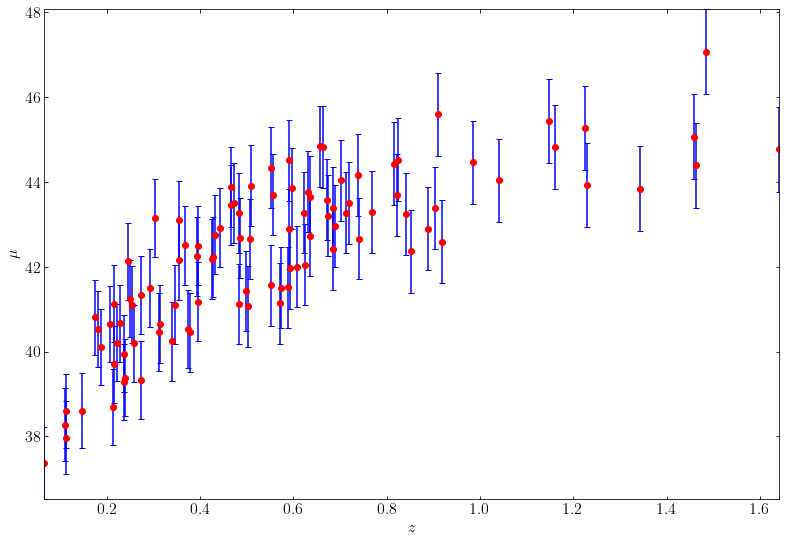

In [7]:
# plot data
fig = plt.figure()
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
ax = fig.add_subplot(111)

ax.errorbar(z_sample,mu_sample,yerr=dmu,fmt='o', color="r",ecolor="b" )
ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

In [8]:
z = np.linspace(0.01, 2, 1000)
mu_true = cosmo.distmod(z)

In [9]:
# ------------------------------------------------------------
# fit the data
# Mesh the input space for evaluations of the real function,
# the prediction and its MSE
z_fit = np.linspace(0, 2, 1000)

kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, alpha=dmu ** 2)

gp.fit(z_sample[:, None], mu_sample)
y_pred, sigma = gp.predict(z_fit[:, None], return_std=True)

# ------------------------------------------------------------

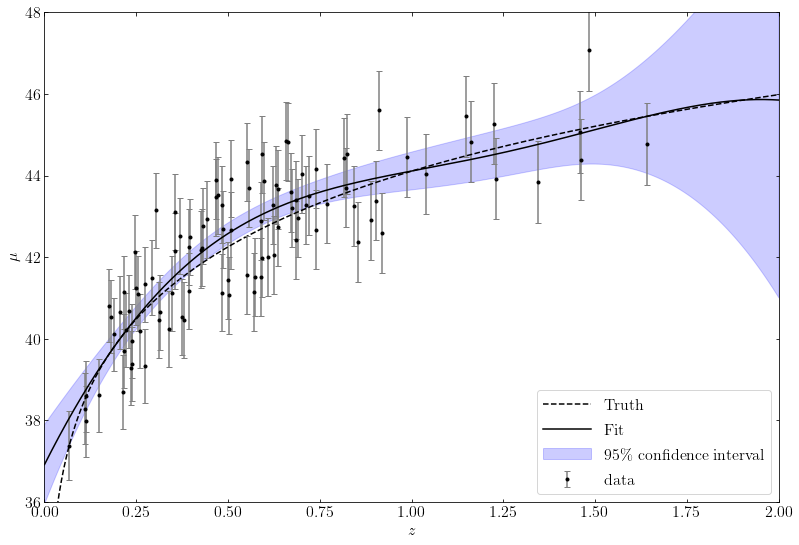

In [10]:

# ------------------------------------------------------------
# Plot the gaussian process
#  gaussian process allows computation of the error at each point
#  so we will show this as a shaded region
fig = plt.figure()
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
ax = fig.add_subplot(111)

ax.plot(z, mu_true, '--k',label="Truth")
ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', markersize=6,label="data")
ax.plot(z_fit, y_pred, '-k',label="Fit")
ax.fill_between(z_fit, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                alpha=0.2, color='b', label='95\% confidence interval')

ax.set_xlabel('$z$')
ax.set_ylabel(r'$\mu$')

ax.set_xlim(0, 2)
ax.set_ylim(36, 48)
ax.legend()

plt.show()
